In [1]:
import numpy as np
import pylab as pl
from __future__ import print_function
import matplotlib.pylab as plt
import time
from IPython.display import display, clear_output

%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
np.random.seed(123)

In [3]:
data1 = np.random.randn(2,100)

In [4]:
data1.shape

(2, 100)

In [5]:
data2 = np.random.randn(2,100) + 2

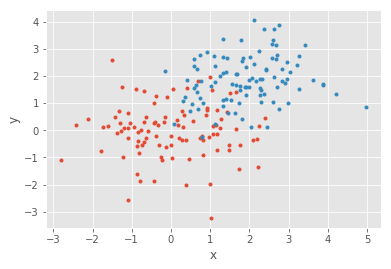

In [6]:
pl.plot(data1[0], data1[1], '.')
pl.plot(data2[0], data2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

# 1. chose the number of clusters 
nclusters = 2

In [7]:
data_stack = np.hstack([data1, data2])

# 2. set a guess for the initial centers

In [8]:
# fix the centers to a poor initial guess
centers = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
#minval, maxval = min(random_stack[0]), max(random_stack[0])
#np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

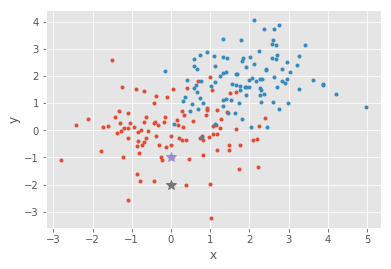

In [9]:
pl.plot(data1[0], data1[1], '.')
pl.plot(data2[0], data2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

In [10]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. check for each point which center is closer

In [11]:
cl1 = distmetric(data1[0], data1[1], centers[0]) < distmetric(data1[0], data1[1], centers[1])
cl2 = distmetric(data2[0], data2[1], centers[0]) < distmetric(data2[0], data2[1], centers[1])

cl1

array([ True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,  True], dtype=bool)

# 4. calculate new centers

In [12]:
newcenter = np.array(
    [np.hstack([data1[:, cl1], data2[:, cl2]]).mean(axis=1), 
        np.hstack([data1[:, ~cl1], data2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newcenter)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 1.00498833  1.03534991]
 [-0.10928169 -2.16218535]]


# 5. iterate 3&4 till convergence

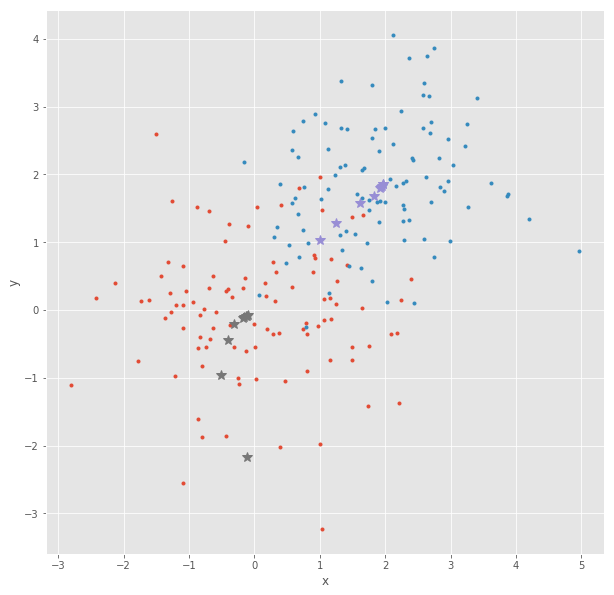

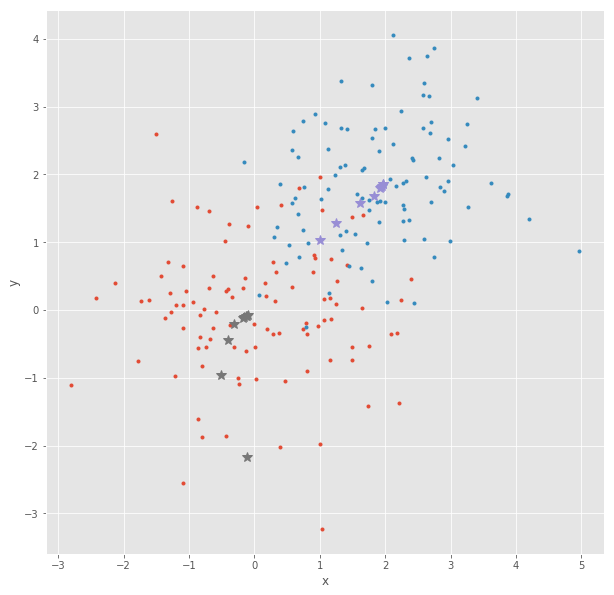

In [13]:
newcx1 = []
newcx2 = []
newcy1 = []
newcy2 = []
centers = np.array([[0.,-1.], [0,-2]]) 

cl1 = distmetric(data1[0], data1[1], centers[0]) < distmetric(data1[0], data1[1], centers[1])
cl2 = distmetric(data2[0], data2[1], centers[0]) < distmetric(data2[0], data2[1], centers[1])
while (np.array(
        [np.hstack([data1[:, cl1], data2[:, cl2]]).mean(axis=1), 
            np.hstack([data1[:, ~cl1], data2[:, ~cl2]]).mean(axis=1)]) != centers).all():
    newc = np.array(
        [np.hstack([data1[:, cl1], data2[:, cl2]]).mean(axis=1), 
            np.hstack([data1[:, ~cl1], data2[:, ~cl2]]).mean(axis=1)])
    newcx1.append(newc[0,0])
    newcx2.append(newc[1,0])
    newcy1.append(newc[0,1])
    newcy2.append(newc[1,1])
    
    centers = newc
    cl1 = distmetric(data1[0], data1[1], centers[0]) < distmetric(data1[0], data1[1], centers[1])
    cl2 = distmetric(data2[0], data2[1], centers[0]) < distmetric(data2[0], data2[1], centers[1])

fig, ax = plt.subplots(figsize=(10,10))
pl.plot(data1[0], data1[1], '.')
pl.plot(data2[0], data2[1], '.')
l1, = ax.plot(newcx1,newcy1,'*', ms=10)
l2, = ax.plot(newcx2,newcy2,'*', ms=10)
ax.set_xlabel('x')
ax.set_ylabel('y')

for i in range(len(newcx1)):
    l1.set_data(newcx1[:i],newcy1[:i])
    l2.set_data(newcx2[:i],newcy2[:i])
    time.sleep(1)
    clear_output(wait=True)
    display(fig)
pl.show()

## Figure. Rendering the clustering as an animation, showing the track of the centers. 

## ASH Score 100